# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [2]:
import os
import keras
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)  
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))  

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    
    return model

In [7]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
OPTIMIZERS = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]


In [8]:
results = {}
for opt in OPTIMIZERS:
    for lr in LEARNING_RATE:
        keras.backend.clear_session()
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = opt(lr=lr)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "OPT: {}, exp-lr-{}".format(opt, lr)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}







Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 50000 

Epoch 44/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.2572 - acc: 0.5561 - val_loss: 1.4039 - val_acc: 0.5026
Epoch 45/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.2540 - acc: 0.5598 - val_loss: 1.4397 - val_acc: 0.4784
Epoch 46/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.2425 - acc: 0.5633 - val_loss: 1.3930 - val_acc: 0.5027
Epoch 47/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.2464 - acc: 0.5622 - val_loss: 1.4914 - val_acc: 0.4670
Epoch 48/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.2313 - acc: 0.5679 - val_loss: 1.3741 - val_acc: 0.5126
Epoch 49/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.2253 - acc: 0.5701 - val_loss: 1.3935 - val_acc: 0.5053
Epoch 50/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.2209 - acc: 0.5725 - val_loss: 1.4818 - val_acc: 0.4748
Model: "model_1"
_________________

Epoch 46/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.6901 - acc: 0.4118 - val_loss: 1.6983 - val_acc: 0.4109
Epoch 47/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.6863 - acc: 0.4135 - val_loss: 1.6960 - val_acc: 0.4070
Epoch 48/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.6827 - acc: 0.4144 - val_loss: 1.6919 - val_acc: 0.4103
Epoch 49/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.6790 - acc: 0.4169 - val_loss: 1.6897 - val_acc: 0.4099
Epoch 50/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.6756 - acc: 0.4170 - val_loss: 1.6845 - val_acc: 0.4117
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        

Epoch 48/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.0365 - acc: 0.2780 - val_loss: 2.0359 - val_acc: 0.2712
Epoch 49/50
50000/50000 [==============================] - 3s 61us/step - loss: 2.0338 - acc: 0.2790 - val_loss: 2.0332 - val_acc: 0.2725
Epoch 50/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.0312 - acc: 0.2796 - val_loss: 2.0306 - val_acc: 0.2745
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128) 

Epoch 50/50
50000/50000 [==============================] - 3s 57us/step - loss: 2.2339 - acc: 0.1874 - val_loss: 2.2341 - val_acc: 0.1866
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
___________________________________________

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 71us

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 70us/step - loss: 2.3421 - acc: 0.2202 - val_loss: 1.9658 - val_acc: 0.2754
Epoch 2/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.8851 - acc: 0.3170 - val_loss: 1.7555 - val_acc: 0.3736
Epoch 3/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.7821 - acc: 0.3617 - val_loss: 1.7265 - val_acc: 0.3704
Epoch 4/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.7044 - acc: 0.3903 - val_loss: 1.7028 - val_acc: 0.3816
Epoch 5/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.6509 - acc: 0.4088 - val_loss: 1.6735 - val_acc: 0.4040
Epoch 6/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.6076 - acc: 0.4222 - val_loss: 1.6611 - val_acc: 0.4105
Epoch 7/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.5624 - acc: 0.4428 - val_loss: 1.5593 - val_acc

Epoch 4/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.8271 - acc: 0.3631 - val_loss: 1.8341 - val_acc: 0.3492
Epoch 5/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.7960 - acc: 0.3752 - val_loss: 1.7850 - val_acc: 0.3810
Epoch 6/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.7714 - acc: 0.3829 - val_loss: 1.7693 - val_acc: 0.3832
Epoch 7/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.7490 - acc: 0.3920 - val_loss: 1.7477 - val_acc: 0.3934
Epoch 8/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.7294 - acc: 0.3989 - val_loss: 1.7304 - val_acc: 0.3930
Epoch 9/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.7118 - acc: 0.4056 - val_loss: 1.7181 - val_acc: 0.4062
Epoch 10/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.6959 - acc: 0.4119 - val_loss: 1.7006 - val_acc: 0.4118
Epoch 11/50
50000/50000 [===============

50000/50000 [==============================] - 3s 63us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 3s 65us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 3s 68us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 3s 68us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 3s 66us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 3s 66us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/50
50000/50000 [==============================] - 3s 65us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 13/50
50000/50000 [==========

Epoch 9/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.7810 - acc: 0.3845 - val_loss: 1.7828 - val_acc: 0.3848
Epoch 10/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.7724 - acc: 0.3865 - val_loss: 1.7746 - val_acc: 0.3913
Epoch 11/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.7649 - acc: 0.3907 - val_loss: 1.7661 - val_acc: 0.3877
Epoch 12/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.7576 - acc: 0.3931 - val_loss: 1.7593 - val_acc: 0.3923
Epoch 13/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.7510 - acc: 0.3961 - val_loss: 1.7544 - val_acc: 0.3921
Epoch 14/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.7451 - acc: 0.3982 - val_loss: 1.7480 - val_acc: 0.3982
Epoch 15/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.7396 - acc: 0.4009 - val_loss: 1.7428 - val_acc: 0.3990
Epoch 16/50
50000/50000 [==========

Epoch 11/50
50000/50000 [==============================] - 3s 64us/step - loss: 2.1150 - acc: 0.2755 - val_loss: 2.1149 - val_acc: 0.2723
Epoch 12/50
50000/50000 [==============================] - 3s 66us/step - loss: 2.1084 - acc: 0.2792 - val_loss: 2.1086 - val_acc: 0.2767
Epoch 13/50
50000/50000 [==============================] - 3s 67us/step - loss: 2.1022 - acc: 0.2823 - val_loss: 2.1025 - val_acc: 0.2799
Epoch 14/50
50000/50000 [==============================] - 3s 66us/step - loss: 2.0963 - acc: 0.2847 - val_loss: 2.0968 - val_acc: 0.2801
Epoch 15/50
50000/50000 [==============================] - 3s 66us/step - loss: 2.0906 - acc: 0.2876 - val_loss: 2.0912 - val_acc: 0.2830
Epoch 16/50
50000/50000 [==============================] - 3s 65us/step - loss: 2.0852 - acc: 0.2896 - val_loss: 2.0860 - val_acc: 0.2857
Epoch 17/50
50000/50000 [==============================] - 3s 65us/step - loss: 2.0801 - acc: 0.2911 - val_loss: 2.0810 - val_acc: 0.2858
Epoch 18/50
50000/50000 [=========

50000/50000 [==============================] - 4s 73us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/50
50000/50000 [==============================] - 3s 69us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/50
50000/50000 [==============================] - 4s 71us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 16/50
50000/50000 [==============================] - 4s 73us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 17/50
50000/50000 [==============================] - 4s 76us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/50
50000/50000 [==============================] - 4s 70us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/50
50000/50000 [==============================] - 3s 68us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/50
50000/50000 [=======

50000/50000 [==============================] - 4s 72us/step - loss: 1.2867 - acc: 0.5477 - val_loss: 1.3883 - val_acc: 0.5070
Epoch 16/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.2693 - acc: 0.5557 - val_loss: 1.3630 - val_acc: 0.5161
Epoch 17/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.2437 - acc: 0.5658 - val_loss: 1.3653 - val_acc: 0.5109
Epoch 18/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.2362 - acc: 0.5677 - val_loss: 1.3553 - val_acc: 0.5150
Epoch 19/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.2105 - acc: 0.5771 - val_loss: 1.3604 - val_acc: 0.5182
Epoch 20/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.2027 - acc: 0.5789 - val_loss: 1.3549 - val_acc: 0.5164
Epoch 21/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.1803 - acc: 0.5865 - val_loss: 1.3473 - val_acc: 0.5252
Epoch 22/50
50000/50000 [=====================

Epoch 17/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.5770 - acc: 0.4511 - val_loss: 1.5919 - val_acc: 0.4425
Epoch 18/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.5664 - acc: 0.4560 - val_loss: 1.5826 - val_acc: 0.4497
Epoch 19/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.5564 - acc: 0.4583 - val_loss: 1.5802 - val_acc: 0.4467
Epoch 20/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.5473 - acc: 0.4624 - val_loss: 1.5691 - val_acc: 0.4541
Epoch 21/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.5387 - acc: 0.4661 - val_loss: 1.5586 - val_acc: 0.4551
Epoch 22/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.5304 - acc: 0.4694 - val_loss: 1.5604 - val_acc: 0.4539
Epoch 23/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.5220 - acc: 0.4704 - val_loss: 1.5463 - val_acc: 0.4585
Epoch 24/50
50000/50000 [=========

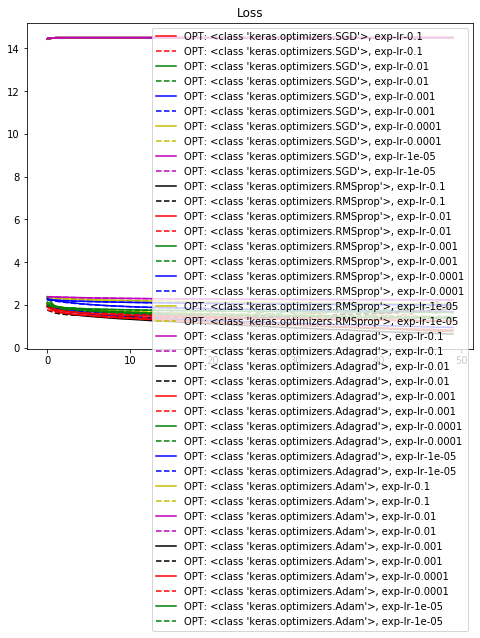

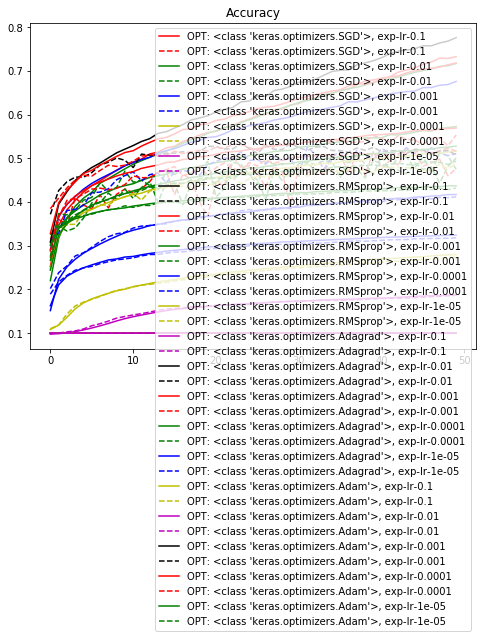

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k","r", "g", "b", "y", "m", "k","r", "g", "b", "y", "m", "k","r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()